## Autoregressive MA Model

In [4]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AR, ARResults, AutoReg,ar_select_order, AutoRegResults

In [5]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/uspopulation.csv", index_col="DATE", parse_dates=True)
df.index.freq="MS"

In [6]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


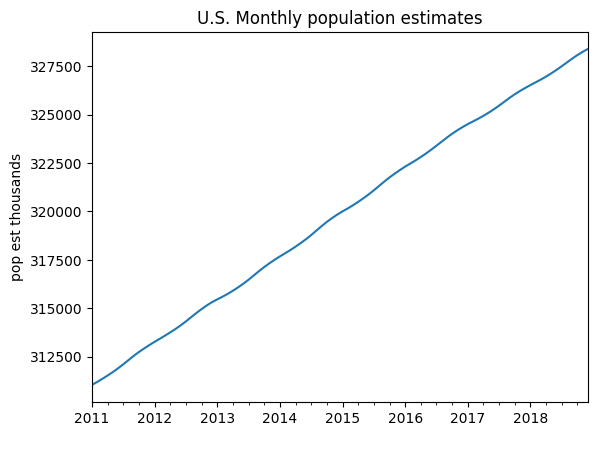

In [7]:
title="U.S. Monthly population estimates"
ylabel="pop est thousands"
xlabel=" "

ax=df["PopEst"].plot(title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Train test splitting

In [8]:
len(df)

96

In [9]:
# one year for testing
train=df.iloc[:84]
test=df.iloc[84:]

In [10]:
#fitting AR 1 model
import warnings
warnings.filterwarnings('ignore')

In [11]:
import statsmodels.tsa.ar_model

In [12]:
model=AutoReg(train["PopEst"],lags=1)
AR1Fit=model.fit()
print(f"Lag: {AR1Fit}")
print(f"Coefficients: \n{AR1Fit.params}")

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000280AAC936C8>
Coefficients: 
const        284.913797
PopEst.L1      0.999686
dtype: float64


In [13]:
AR1Fit.aic, AR1Fit.aicc

(767.6378091856507, 767.9416066540051)

In [14]:
AR1Fit.ar_lags

[1]

In [15]:
start=len(train)
end=len(train)+len(test)-1
predictions1=AR1Fit.predict(start=start,end=end,dynamic=False).rename("AR1 Predictions")

In [16]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1 Predictions, dtype: float64

In [17]:
# compare predictions to expected values
for i in range(len(predictions1)):
        print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


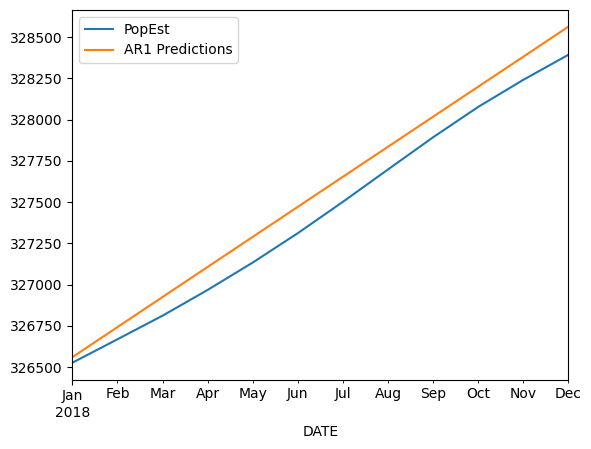

In [18]:
test["PopEst"].plot(legend=True)
predictions1.plot(legend=True);

### AR2 Model Fitting

In [19]:
from sklearn.metrics import mean_squared_error

In [52]:
model=AutoReg(train["PopEst"],lags=2)
AR2Fit=model.fit()
print(f"Lag: {AR2Fit}")
print(f"Coefficients: \n{AR2Fit.params}")

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000280ACF641C8>
Coefficients: 
const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64


In [53]:
start=len(train)
end=len(train)+len(test)-1
predictions2=AR2Fit.predict(start=start,end=end,dynamic=False).rename("AR(2) Predictions")

<AxesSubplot:xlabel='DATE'>

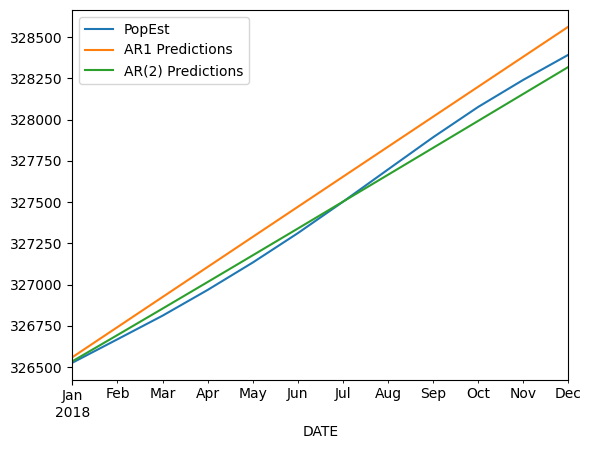

In [55]:
test["PopEst"].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [56]:
AR2Fit.ar_lags

[1, 2]

### AR(p) model and finding

In [99]:
model=ar_select_order(train['PopEst'],maxlag=13,glob=True)
# ARFit=model.fit()
# print(f"Lag: {ARFit}")
# print(f"Coefficients: \n{ARFit.params}")

In [100]:
model.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [72]:
model=AutoReg(train["PopEst"],lags=11)
AR11Fit=model.fit()
print(f"Lag: {AR2Fit}")
print(f"Coefficients: \n{AR11Fit.params}")

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000280ACF641C8>
Coefficients: 
const         96.143523
PopEst.L1      2.298626
PopEst.L2     -2.027441
PopEst.L3      1.356878
PopEst.L4     -1.171630
PopEst.L5      0.816723
PopEst.L6     -0.699990
PopEst.L7      0.727004
PopEst.L8     -0.354790
PopEst.L9      0.241036
PopEst.L10    -0.179865
PopEst.L11    -0.006819
dtype: float64


In [105]:
model=AutoReg(train["PopEst"],lags=11)
AR11Fit=model.fit()
print(f"Lag: {AR2Fit}")
print(f"Coefficients: \n{AR11Fit.params}")

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000280ACF641C8>
Coefficients: 
const         96.143523
PopEst.L1      2.298626
PopEst.L2     -2.027441
PopEst.L3      1.356878
PopEst.L4     -1.171630
PopEst.L5      0.816723
PopEst.L6     -0.699990
PopEst.L7      0.727004
PopEst.L8     -0.354790
PopEst.L9      0.241036
PopEst.L10    -0.179865
PopEst.L11    -0.006819
dtype: float64


In [108]:
AR11Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                    AutoReg(11)   Log Likelihood                -220.560
Method:               Conditional MLE   S.D. of innovations              4.965
Date:                Thu, 15 Jun 2023   AIC                            467.120
Time:                        14:58:15   BIC                            496.896
Sample:                    12-01-2011   HQIC                           478.986
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.1435     52.966      1.815      0.069      -7.668     199.955
PopEst.L1      2.2986      0.117     19.571      0.000       2.068       2.529
PopEst.L2     -2.0274      0.294     -6.886      0.000      -2.605      -1.450
PopEst.L3      1.3569      0.373      3.642      0.000       0.627       2.087
PopEst.L4     -1.1716      0.399     -2.940      0.003      -1.953      -0.391
PopEst.L5      0.8167      0.413      1.978      0.048       0.007       1.626
PopEst.L6     -0.7000      0.414     -1.691      0.091      -1.511       0.111
PopEst.L7      0.7270      0.408      1.780      0.075      -0.073       1.527
PopEst.L8     -0.3548      0.391     -0.908      0.364      -1.121       0.411
PopEst.L9      0.2410      0.360      0.670      0.503      -0.464       0.946
PopEst.L10    -0.1799      0.282     -0.638      0.523      -0.732       0.373
PopEst.L11    -0.0068      0.116     -0.059      0.953      -0.235       0.221
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8721           -0.5029j            1.0067           -0.0833
AR.2             0.8721           +0.5029j            1.0067            0.0833
AR.3             1.0056           -0.0000j            1.0056           -0.0000
AR.4             1.0242           -0.0000j            1.0242           -0.0000
AR.5            -1.0186           -0.7737j            1.2791           -0.3966
AR.6            -1.0186           +0.7737j            1.2791            0.3966
AR.7             0.2315           -1.2096j            1.2315           -0.2199
AR.8             0.2315           +1.2096j            1.2315            0.2199
AR.9            -0.4260           -1.3640j            1.4290           -0.2982
AR.10           -0.4260           +1.3640j            1.4290            0.2982
AR.11          -27.7238           -0.0000j           27.7238           -0.5000
------------------------------------------------------------------------------
"""

In [109]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

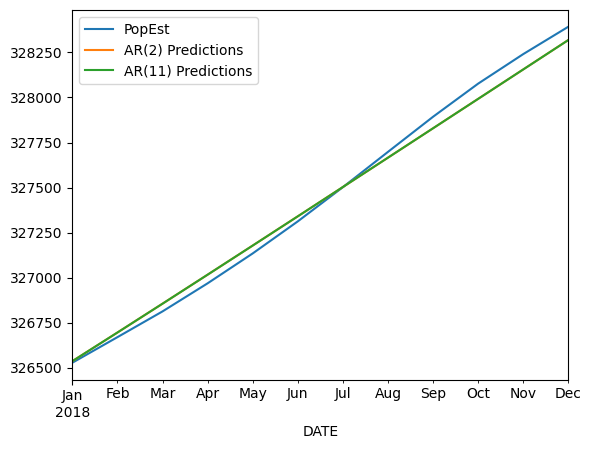

In [118]:
test['PopEst'].plot(legend=True)
#predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True);
#AR2 and AR 11 overlaps

### Eval the model

In [119]:
from sklearn.metrics import mean_squared_error

labels=["AR(1)","AR(2)","AR(11)"]
preds=[predictions1,predictions2,predictions11]

for i in range(len(labels)):
    error=mean_squared_error(test["PopEst"],preds[i])
    print(f"{labels[i]} Error: {error:11.10}")

AR(1) Error: 17449.71424
AR(2) Error: 2713.258668
AR(11) Error: 2713.258668


In [124]:
modls=[AR1Fit,AR2Fit,ARfit]

for i in range(len(modls)):
    print(f"{labels[i]} AIC {modls[i].aic}")

AR(1) AIC 767.6378091856507
AR(2) AIC 649.2094848772462
AR(11) AIC 649.2094848772462


### Forecasting

In [126]:
model=AutoReg(train["PopEst"],lags=11)
ARFit=model.fit()
print(f"Lag: {AR1Fit}")
print(f"Coefficients: \n{ARFit.params}")

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000280AAC936C8>
Coefficients: 
const         96.143523
PopEst.L1      2.298626
PopEst.L2     -2.027441
PopEst.L3      1.356878
PopEst.L4     -1.171630
PopEst.L5      0.816723
PopEst.L6     -0.699990
PopEst.L7      0.727004
PopEst.L8     -0.354790
PopEst.L9      0.241036
PopEst.L10    -0.179865
PopEst.L11    -0.006819
dtype: float64


In [129]:
fcast=ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename("Forcast")

<AxesSubplot:xlabel='DATE'>

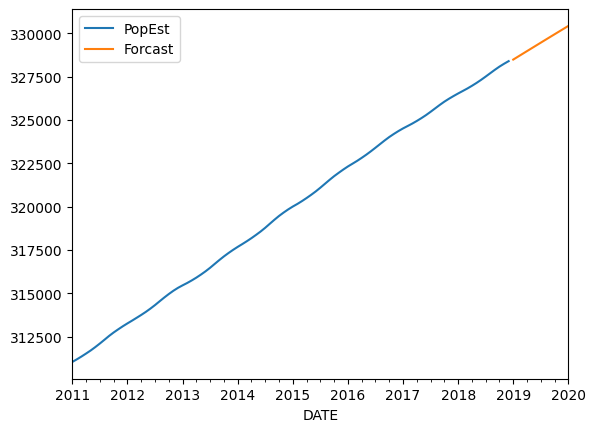

In [130]:
df["PopEst"].plot(legend = True)
fcast.plot(legend=True)